In [2]:
# Testing pandas
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pydotplus 
import pydot
from sklearn import tree
from sklearn import preprocessing
from IPython.display import Image

fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
dataset = pd.read_csv(fileURL, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], header=None, delimiter = ',')

In [4]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


1.Write a small paragraph describing the dataset that you choose, its features, number of instances, nature of the data, and anything else that you found to be interesting.

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

Predicted attribute: class of iris plant.  
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica

Attribute Information:
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 


<br>Number of instances: 150

2.Provide a brief analysis of the dataset you downloaded. Does it have missing data? Are the features numeric/discrete/categorical? Create some histograms/boxplots/other visualizations to illustrate the content o the dataset.
<br>Attribute Characteristics: Number
<br>Missing values: 0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11505d748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x118fd1e10>]], dtype=object)

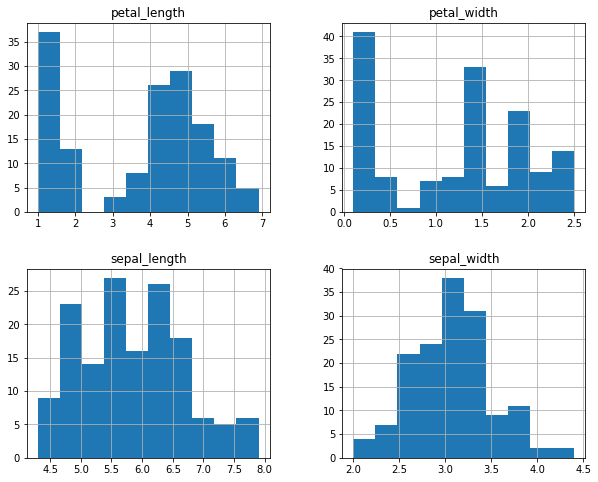

In [5]:
dataset.hist(figsize = (10,8))

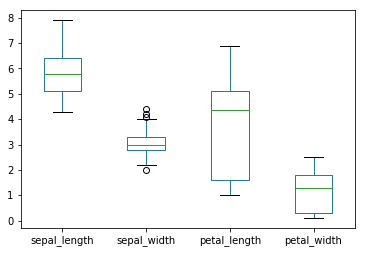

In [6]:
dataset.boxplot(grid=False)

3.Using scikit-learns DecisionTreeClassifier, train a supervised learning model that can be used to generate predicions for your data. 
<br>4.Create a visualization of your tree.

In [7]:
# Train a supervised learning model using scikit-learn's DesicionTreeClassifier
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'class'

X, Y = dataset[feature_cols], dataset[target]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)


In [8]:
from sklearn.externals.six import StringIO  
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                     feature_names=feature_cols,
                     class_names=target)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')

True

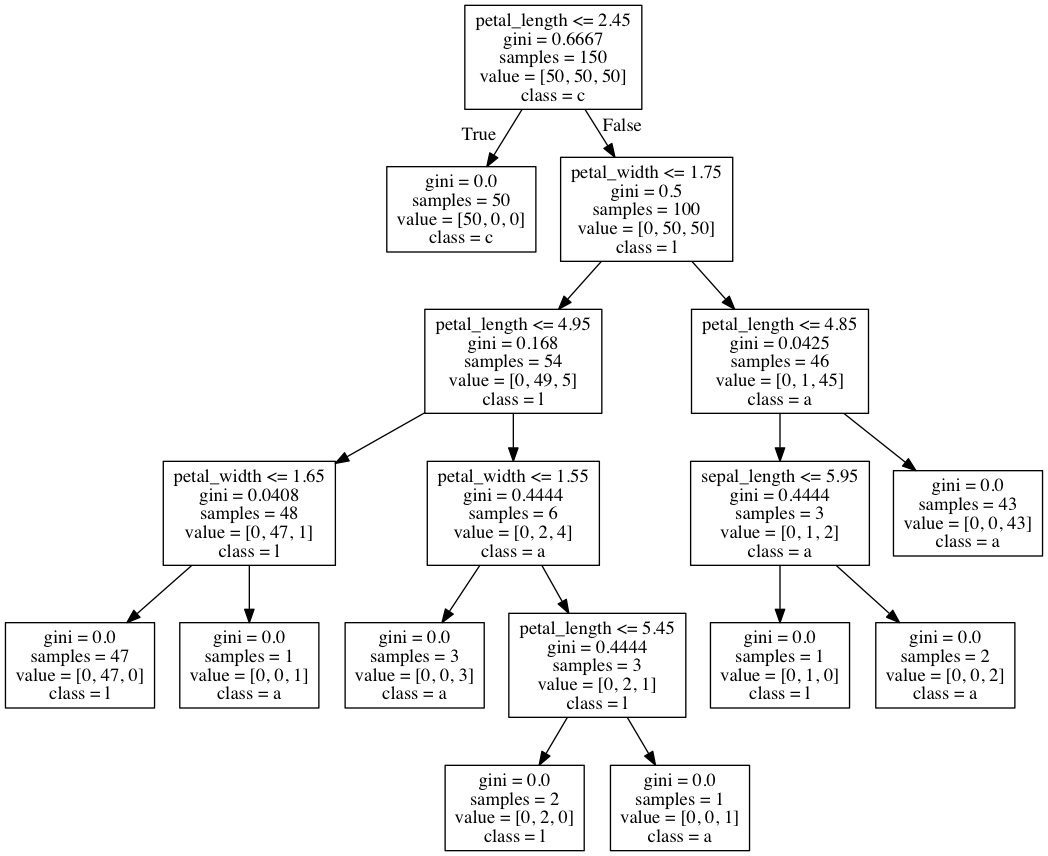

In [9]:
Image('tree.png')

5.Create a new instance with your choice of values for each of the features. Use your trained model to generate a prediction for it. Using your tree illustration as a reference, write a short paragraph describing how your model went about generating that specific prediction. Does it make sense to you? Can it be improved? Go back and play with the parameters that you used for training your tree and see if you can obtain better results.

In [11]:
newInstance = [7.4,2.8,6.1,1.9] 

clf.predict(newInstance)

/Users/ChangLiu/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array(['Iris-virginica'], dtype=object)

The instance I choose is a real data in dataset and the prediction is valid.
The decision process is: petal_width <= 0.8 (true)  ~  petal_width <= 1.75 (false)  ~  petal_length <= 4.85 (false)  ~  get the result of class 'Iris-virginica'.

Although I think the predict is good, I play with the parameters adding the criterion 'entropy'/'gini' and splitter 'random'/'best' to generate a new tree. But the tree structures always stay the same. We might savely conclude that the decision tree is valid enough.

In [15]:
clf2 = tree.DecisionTreeClassifier(criterion='gini', splitter='random')
clf2 = clf2.fit(X, Y)
clf2.predict(newInstance)

/Users/ChangLiu/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array(['Iris-virginica'], dtype=object)

In [13]:
dot_data2 = StringIO()
tree.export_graphviz(clf2, out_file=dot_data2,
                     feature_names=feature_cols,
                     class_names=target)
graph2 = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph2.write_png('tree2.png')

True

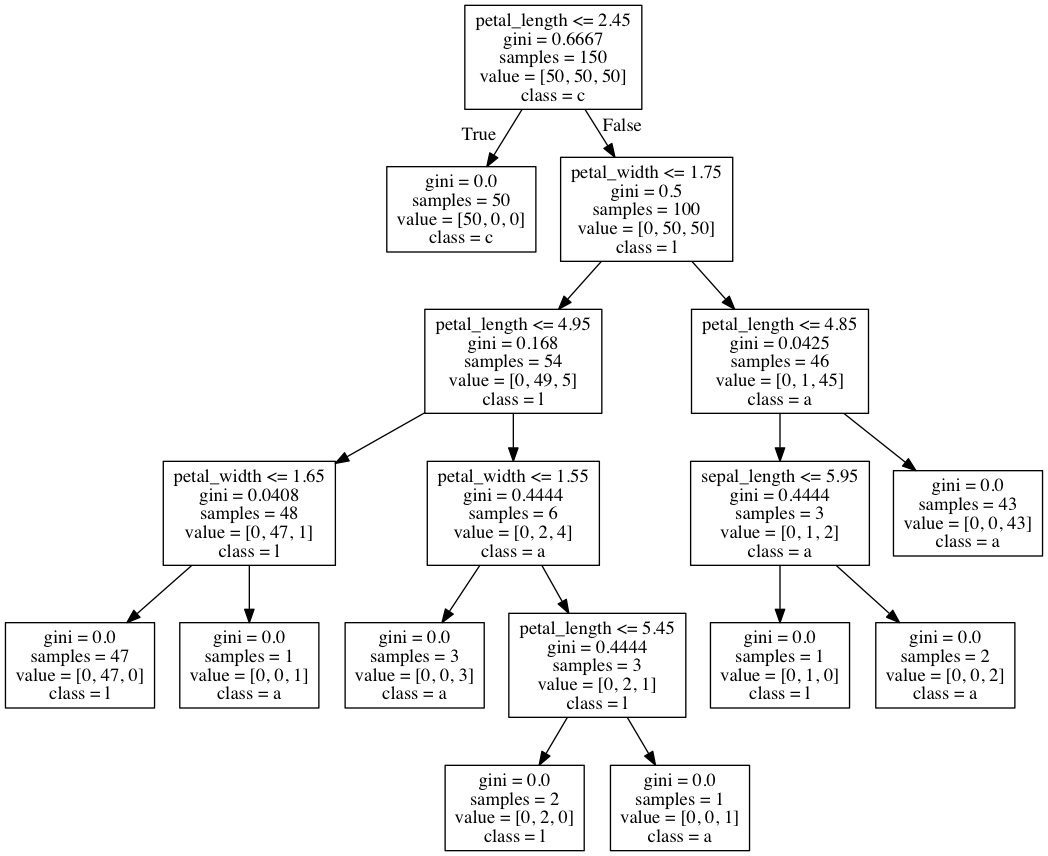

In [14]:
Image('tree2.png')